In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

+--------------------+------------------------+----------+
| Band               | Taxable income         | Tax rate |
+--------------------+------------------------+----------+
| Personal Allowance | Up to £12,570          | 0%       |
+--------------------+------------------------+----------+
| Basic rate         | £12,571 to £50,270     | 20%      |
+--------------------+------------------------+----------+
| Higher rate        | £50,271 to £125,140    | 40%      |
+--------------------+------------------------+----------+
| Additional rate    | over £125,140          | 45%      |
+--------------------+------------------------+----------+

In [2]:
def tax(income):
	"""
	Calculate tax based on income.
	"""
	if income <= 12_570:
		return 0
	elif income <= 50_270:
		return (income - 12_570) * 0.2
	elif income <= 125_140:
		return (50_270 - 12_570) * 0.2 + (income - 50_270) * 0.4
	else:
		return (50_270 - 12_570) * 0.2 + (125_140 - 50_270) * 0.4 + (income - 125_140) * 0.45

def tax_bracket(income):
	"""
	Determine the tax bracket based on income.
	"""
	if income <= 12_570:
		return "No tax"
	elif income <= 50_270:
		return "Basic rate (20%)"
	elif income <= 125_140:
		return "Higher rate (40%)"
	else:
		return "Additional rate (45%)"
	

In [40]:
df = pd.DataFrame({
	"income": np.arange(0, 500_000, 1)
})

df["tax"] = df["income"].apply(tax)
df["net_income"] = df["income"] - df["tax"]
df["tax_rate"] = df["tax"] / df["income"].replace(0, np.nan) * 100
df["tax_rate"] = df["tax_rate"].fillna(0)
df["tax_bracket"] = df["income"].apply(tax_bracket)

In [44]:
low_income = df[df["income"] <= 50_000]
poly = np.polyfit(low_income["income"], low_income["tax"], 2)

In [45]:
df["polynomial"] = np.polyval(poly, df["income"])

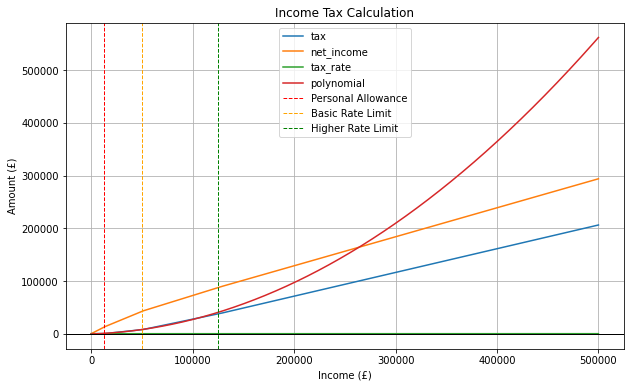

In [46]:
df.plot(
	x="income",
	y=["tax", "net_income", "tax_rate", "polynomial"],
	kind="line",
	title="Income Tax Calculation",
	xlabel="Income (£)",
	ylabel="Amount (£)",
	figsize=(10, 6),
	grid=True
)

plt.axhline(0, color='black', lw=1)
plt.axvline(12_570, color='red', lw=1, ls='--', label='Personal Allowance')
plt.axvline(50_270, color='orange', lw=1, ls='--', label='Basic Rate Limit')
plt.axvline(125_140, color='green', lw=1, ls='--', label='Higher Rate Limit')
plt.legend()
plt.show()

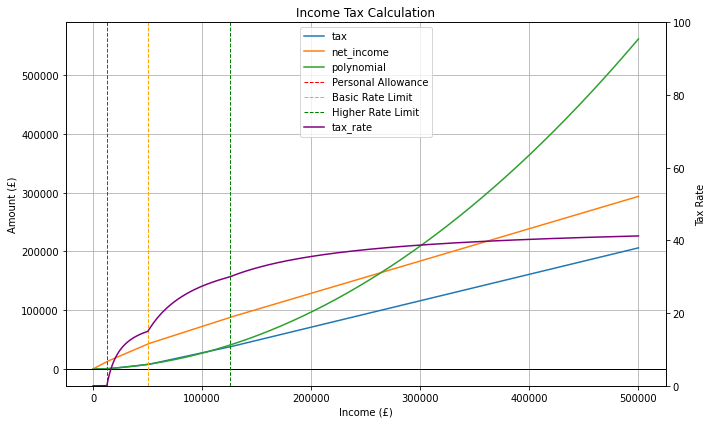

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot income, tax, and net_income on the primary y-axis
ax1.plot(df["income"], df["tax"], label="tax")
ax1.plot(df["income"], df["net_income"], label="net_income")
ax1.plot(df["income"], df["polynomial"], label="polynomial")
ax1.set_xlabel("Income (£)")
ax1.set_ylabel("Amount (£)")
ax1.grid(True)

# Create a secondary y-axis for tax_rate
ax2 = ax1.twinx()
ax2.set_ylim(0, 100)
ax2.plot(df["income"], df["tax_rate"], color="purple", label="tax_rate")
ax2.set_ylabel("Tax Rate")

# Add the vertical lines for tax thresholds
ax1.axhline(0, color='black', lw=1)
ax1.axvline(12_570, color='red', lw=1, ls='--', label='Personal Allowance')
ax1.axvline(50_270, color='orange', lw=1, ls='--', label='Basic Rate Limit')
ax1.axvline(125_140, color='green', lw=1, ls='--', label='Higher Rate Limit')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title("Income Tax Calculation")
plt.tight_layout()
plt.show()